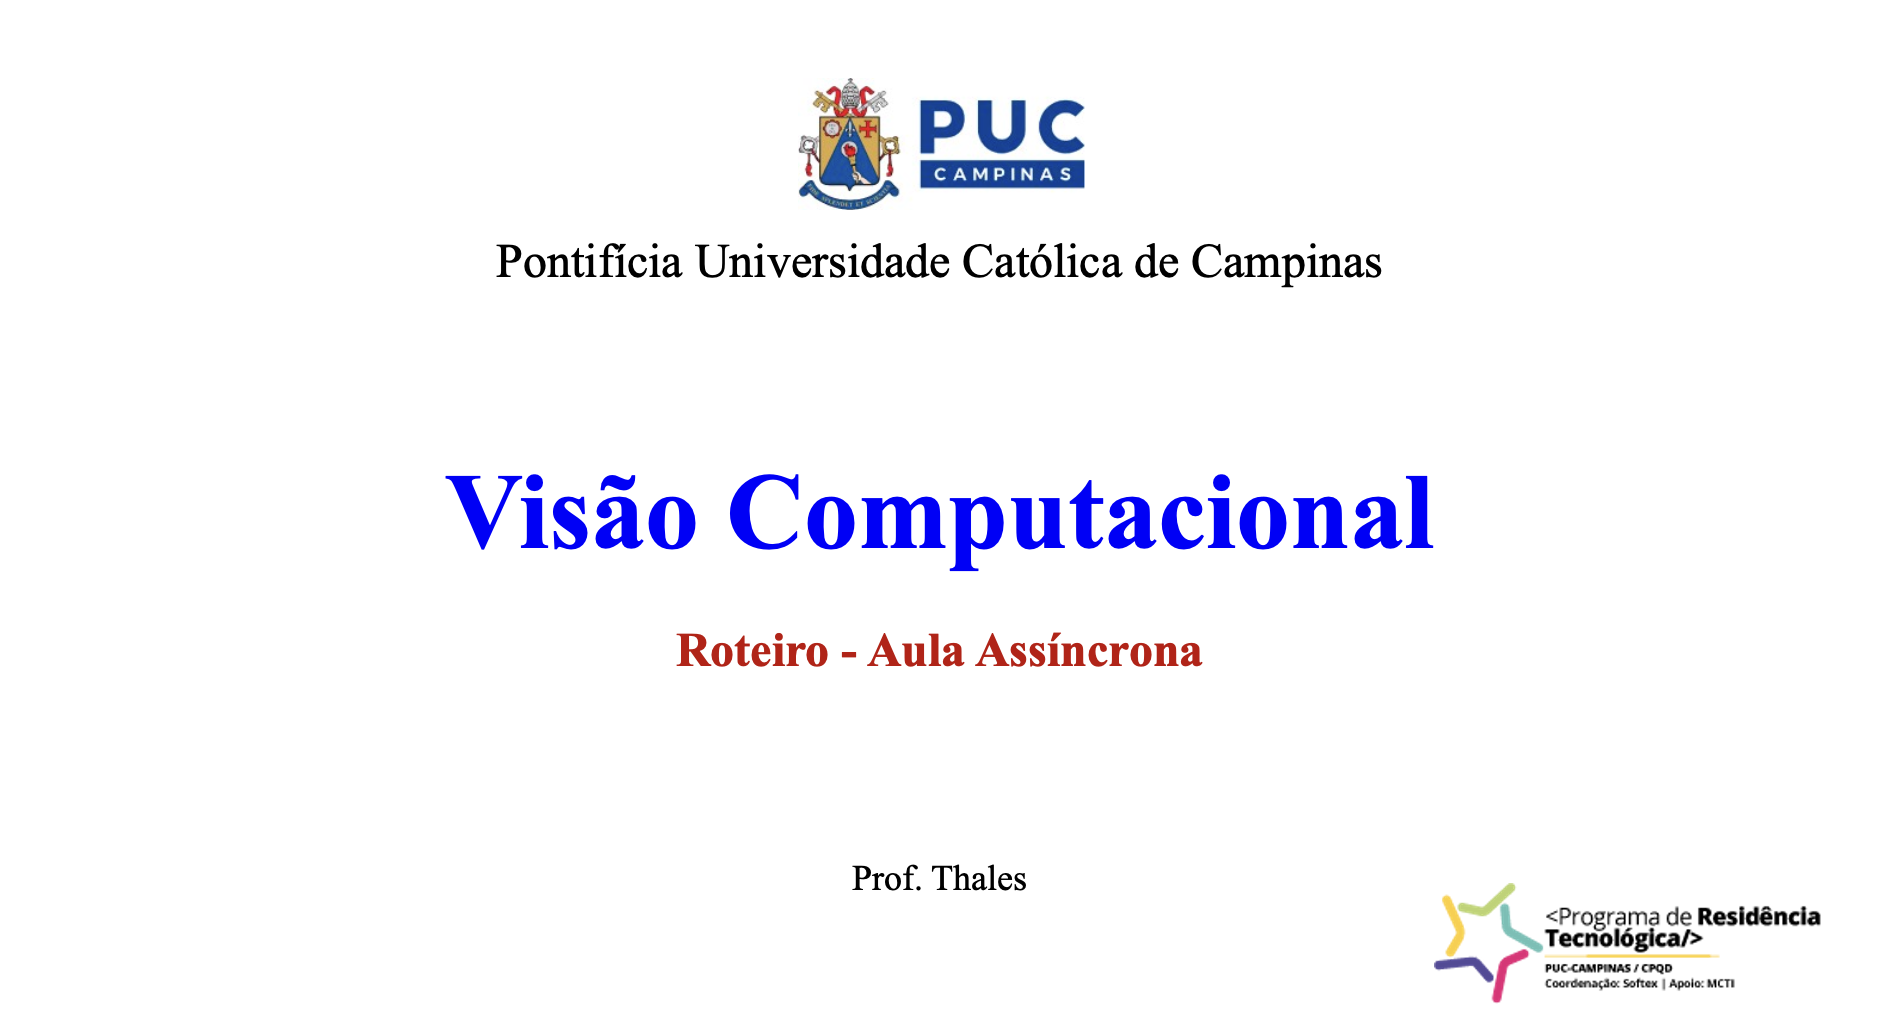



---



---

# **Summ√°rio:**


1. ## Implementar abordagens para segmenta√ß√£o de imagens: semantic segmentation, object detection e instance segmentation;

2. ## Aplicar modelos de deep learning: autoencoders.




---

---



# T√≥pico I: Semantic Segmentation


<p style='text-align: justify;'> A segmenta√ß√£o sem√¢ntica (Semantic Segmentation, em ingl√™s) √© uma tarefa importante de vis√£o computacional que envolve atribuir um r√≥tulo de classe a cada pixel de uma imagem. Em outras palavras, o objetivo da segmenta√ß√£o sem√¢ntica √© dividir uma imagem em regi√µes ou segmentos, onde cada segmento √© rotulado com a categoria ou classe correspondente, indicando qual objeto ou tipo de objeto est√° presente naquela regi√£o da imagem. </p>

---

---

## Rode novamente o c√≥digo abaixo e observe um dos poss√≠veis procedimentos para semantic segmentation, sobretudo, na cria√ß√£o do dataset.

---

---

In [1]:
# Na linha abaixo, usamos o comando git clone para clonar um reposit√≥rio do GitHub.
!git clone https://github.com/LukeTonin/simple-deep-learning

# Aqui, usamos o %cd para mudar o diret√≥rio de trabalho atual para "simple-deep-learning".
# Isso significa que estamos entrando no diret√≥rio rec√©m-clonado onde o c√≥digo do reposit√≥rio foi baixado.
%cd simple-deep-learning

Cloning into 'simple-deep-learning'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 55 (delta 24), reused 44 (delta 14), pack-reused 0
Receiving objects: 100% (55/55), 433.45 KiB | 10.08 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/simple-deep-learning


In [2]:
# Importa a biblioteca TensorFlow com o alias 'tf', que ser√° usada para trabalhar com redes neurais e conjuntos de dados.
import tensorflow as tf

# Carrega o conjunto de dados MNIST da biblioteca TensorFlow Keras e o divide em conjuntos de treinamento e teste.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Exibe as formas (dimens√µes) dos conjuntos de imagens e r√≥tulos de treinamento.
print(train_images.shape, train_labels.shape)

# Exibe as formas (dimens√µes) dos conjuntos de imagens e r√≥tulos de teste.
print(test_images.shape, test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- A imagem de entrada √© criada atrav√©s da sobreposi√ß√£o aleat√≥ria de d√≠gitos do conjunto de dados MNIST original numa matriz vazia.

- Agora, vamos gerar imagens com altura e largura de 60 p√≠xeis e escolher os d√≠gitos 0-4 (ou seja, num_classes = 5). Vamos utilizar apenas os par√¢metros b√°sicos da fun√ß√£o create_semantic_segmentation_dataset.

In [3]:
# Importa a biblioteca NumPy com o alias 'np', que ser√° usada para opera√ß√µes num√©ricas.
import numpy as np

# Define uma semente para a gera√ß√£o de n√∫meros aleat√≥rios com o objetivo de tornar os resultados reprodut√≠veis.
np.random.seed(seed=9)

# Importa fun√ß√µes do m√≥dulo 'semantic_segmentation' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.semantic_segmentation import (create_semantic_segmentation_dataset,
                                                                       display_segmented_image,
                                                                       display_grayscale_array,
                                                                       plot_class_masks)

# Chama a fun√ß√£o 'create_semantic_segmentation_dataset' para criar um conjunto de dados de segmenta√ß√£o sem√¢ntica.
# - 'num_train_samples': n√∫mero de amostras de treinamento a serem geradas.
# - 'num_test_samples': n√∫mero de amostras de teste a serem geradas.
# - 'image_shape': forma das imagens geradas (60x60 pixels).
# - 'num_classes': n√∫mero de classes ou r√≥tulos diferentes no conjunto de dados (5 classes).
train_x, train_y, test_x, test_y = create_semantic_segmentation_dataset(num_train_samples=100,
                                                                        num_test_samples=10,
                                                                        image_shape=(60, 60),
                                                                        num_classes=5)

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

O c√≥digo seguinte apresenta a imagem de entrada, que, como j√° foi referido, √© simplesmente os d√≠gitos originais do MNIST sobrepostos aleatoriamente numa tela em branco.

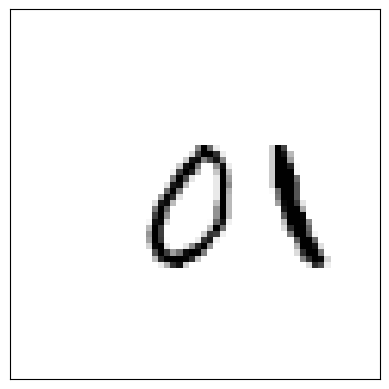

In [4]:
# Importa a fun√ß√£o 'display_grayscale_array' do m√≥dulo 'semantic_segmentation' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.semantic_segmentation import display_grayscale_array

# Gera um n√∫mero inteiro aleat√≥rio 'i' no intervalo de 0 a 'len(train_x)', ou seja, √≠ndice de uma amostra de treinamento.
i = np.random.randint(len(train_x))

# Chama a fun√ß√£o 'display_grayscale_array' para exibir a imagem de treinamento no √≠ndice 'i'.
# - 'array': a imagem de treinamento a ser exibida.
display_grayscale_array(array=train_x[i])

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- Na c√©lula seguinte, temos uma fun√ß√£o que indexa a matriz de destino ao longo do terceiro eixo (o eixo das classes) e apresenta cada "fatia"
 (de label) individualmente.

- Cada "fatia" cont√©m apenas um tipo de d√≠gito. No nosso caso, a imagem de entrada √© composta por 2 dois e 2 quatros. Agora, note que a matriz alvo tem 2 dois na "fatia" 2 e 2 quatros na "fatia" 4 **(Estes n√∫meros podem variar conforme o seu sorteio)**.

- Ao separar os d√≠gitos de uma determinada classe em diferentes "fatias"" dizemos ao nosso modelo quais os pix√©is que correspondem a cada classe. Ao treinar um modelo, queremos que este seja capaz de separar os pix√©is da imagem original na sua respectiva "fatia".

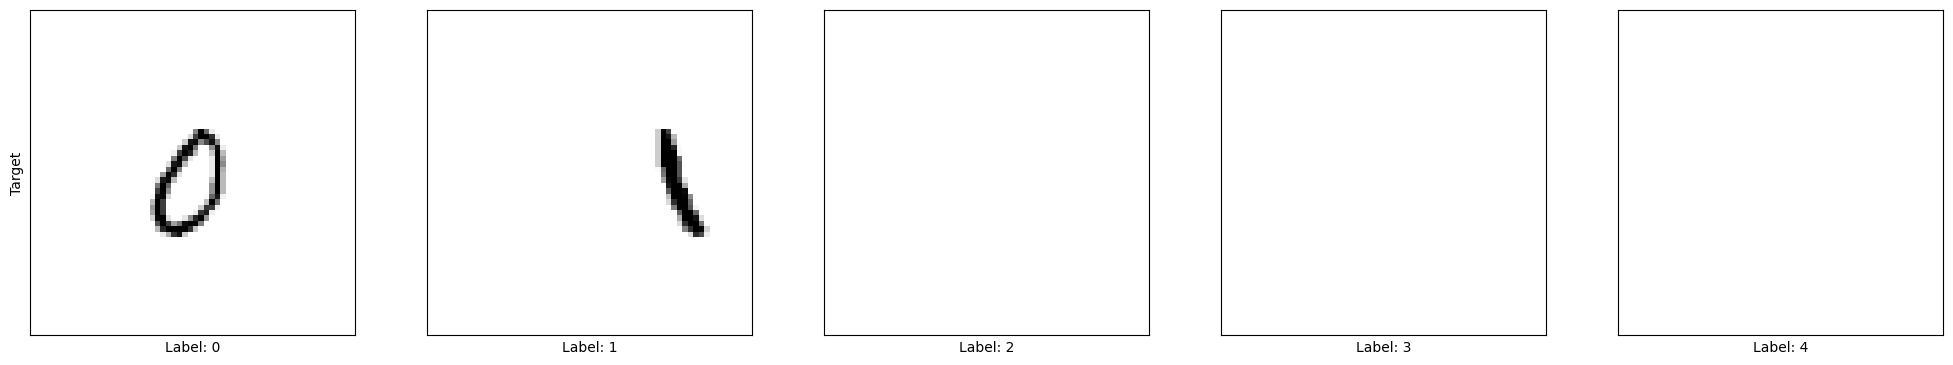

In [5]:
# Importa a fun√ß√£o 'plot_class_masks' do m√≥dulo 'semantic_segmentation' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.semantic_segmentation import plot_class_masks

# Chama a fun√ß√£o 'plot_class_masks' para exibir as m√°scaras de classes associadas √† imagem de treinamento no √≠ndice 'i'.
# - 'train_y[i]': as m√°scaras de classes correspondentes √† imagem de treinamento selecionada.
plot_class_masks(train_y[i])

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- Abaixo est√° outra forma de exibir os d√≠gitos. Desta vez, em vez de separar as fatias, damos a cada fatia uma cor espec√≠fica **(Os n√∫meros podem variar conforme o seu sorteio)**.

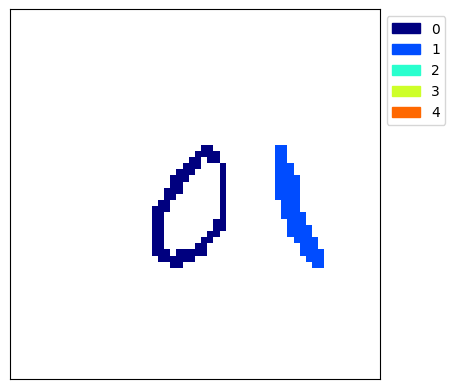

In [6]:
# Chama a fun√ß√£o 'display_segmented_image' para exibir uma imagem segmentada com base nas m√°scaras de classes 'train_y[i]'.
# - 'y=train_y[i]': as m√°scaras de classes associadas √† imagem de treinamento selecionada.
display_segmented_image(y=train_y[i])



---


---




# T√≥pico II: Object Detection

<p style='text-align: justify;'> A detec√ß√£o de objetos (Object Detection, em ingl√™s) √© uma tarefa fundamental de vis√£o computacional que envolve identificar e localizar objetos em uma imagem ou v√≠deo. A principal diferen√ßa entre a detec√ß√£o de objetos e outras tarefas de vis√£o computacional, como classifica√ß√£o de imagem e segmenta√ß√£o sem√¢ntica, √© que a detec√ß√£o de objetos n√£o apenas identifica a presen√ßa de objetos, mas tamb√©m delimita suas localiza√ß√µes exatas na imagem, geralmente com caixas delimitadoras retangulares. </p>


---

---

## Rode novamente o c√≥digo abaixo e observe o exemplo sobre object detection.

---

---

In [7]:
# importa√ß√£o da numpy
import numpy as np

# Importa a fun√ß√£o 'create_object_detection_dataset' do m√≥dulo 'object_detection' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.object_detection import create_object_detection_dataset

# Chama a fun√ß√£o 'create_object_detection_dataset' para criar um conjunto de dados de detec√ß√£o de objetos.
# - 'num_train_samples': n√∫mero de amostras de treinamento a serem geradas.
# - 'num_test_samples': n√∫mero de amostras de teste a serem geradas.
# - 'image_shape': forma das imagens geradas (60x60 pixels).
# A fun√ß√£o retorna os conjuntos de imagens de treinamento, caixas delimitadoras de objetos de treinamento, r√≥tulos de treinamento,
# imagens de teste, caixas delimitadoras de objetos de teste e r√≥tulos de teste.
train_x, train_bounding_boxes, train_labels, test_x, test_bounding_boxes, test_labels = create_object_detection_dataset(
    num_train_samples=100,
    num_test_samples=10,
    image_shape=(60, 60))

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- A matriz de entrada (ou seja, x) tem o mesmo formato que para a segmenta√ß√£o sem√¢ntica.

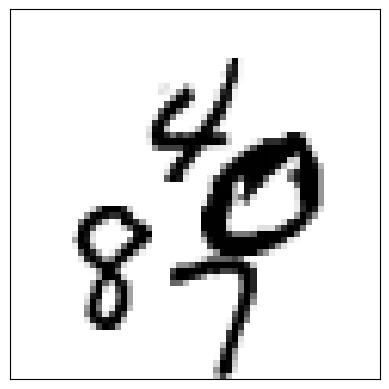

In [8]:
# Importa a fun√ß√£o 'display_grayscale_array' do m√≥dulo 'semantic_segmentation' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.semantic_segmentation import display_grayscale_array

# Gera um n√∫mero inteiro aleat√≥rio 'i' no intervalo de 0 a 'len(train_x)', ou seja, √≠ndice de uma amostra de treinamento.
i = np.random.randint(len(train_x))

# Chama a fun√ß√£o 'display_grayscale_array' para exibir a imagem de treinamento no √≠ndice 'i'.
# - 'array=train_x[i]': a imagem de treinamento a ser exibida.
display_grayscale_array(array=train_x[i])

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- Vamos dar uma olhada nas caixas delimitadoras e nas etiquetas/nos r√≥tulos.
- Neste caso, vemos as coordenadas (xmin, ymin, xmax, ymax) de cada caixa delimitadora, bem como a etiqueta associada.

In [9]:
print(train_bounding_boxes[i]) # coordenadas
print(train_labels[i]) # Labels

[[20 32 48 60]
 [26 16 54 44]
 [ 2 27 30 55]
 [15  4 43 32]]
[7 0 8 4]


### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- **Alvo:** √â o objeto ou categoria espec√≠fica que o modelo de detec√ß√£o de objetos est√° tentando encontrar em uma imagem. Por exemplo, se o alvo for "carro", o modelo tentar√° detectar todos os carros na imagem.

- **Bounding Box:** √â a caixa retangular que delimita e localiza o objeto detectado na imagem. Essa caixa fornece informa√ß√µes sobre a posi√ß√£o e o tamanho do objeto detectado na imagem.

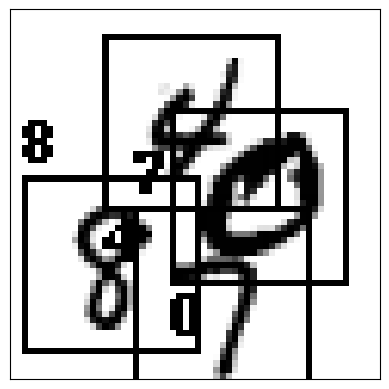

In [10]:
# Importa a fun√ß√£o 'draw_bounding_boxes' do m√≥dulo 'object_detection' do pacote 'simple_deep_learning.mnist_extended'.
from simple_deep_learning.mnist_extended.object_detection import draw_bounding_boxes

# Chama a fun√ß√£o 'draw_bounding_boxes' para desenhar caixas delimitadoras em uma imagem.
# - 'train_x[i]': a imagem de treinamento na qual as caixas delimitadoras ser√£o desenhadas.
# - 'bounding_boxes=train_bounding_boxes[i]': as caixas delimitadoras de objetos associadas √† imagem de treinamento selecionada.
# - 'labels=train_labels[i]': os r√≥tulos associados √† imagem de treinamento selecionada.
# A fun√ß√£o retorna uma imagem com as caixas delimitadoras desenhadas.
a = np.array(draw_bounding_boxes(train_x[i], bounding_boxes=train_bounding_boxes[i], labels=train_labels[i]))

# Exibe a imagem resultante que cont√©m caixas delimitadoras desenhadas.
display_grayscale_array(a)



---
---



# T√≥pico III: Instance Segmentation

<p style='text-align: justify;'> A segmenta√ß√£o de inst√¢ncias (Instance Segmentation, em ingl√™s) √© uma tarefa de vis√£o computacional avan√ßada que combina dois desafios principais: detec√ß√£o de objetos e segmenta√ß√£o sem√¢ntica. Nessa tarefa, o objetivo √© identificar objetos individuais em uma imagem e, ao mesmo tempo, segmentar cada objeto, atribuindo um r√≥tulo √∫nico a cada inst√¢ncia do mesmo tipo de objeto. </p>

---

---

## Rode novamente o c√≥digo abaixo e observe uma das poss√≠veis implementa√ß√µes, via YOLO, sobre instance segmentetaion.

---

---

In [11]:
# Instala a vers√£o espec√≠fica (8.0.28) da biblioteca 'ultralytics' usando o comando pip.
!pip install ultralytics==8.0.28

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 272.6/272.6 kB 3.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 224.8/224.8 kB 7.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 11.7 MB/s eta 0:00:00


In [12]:
# Importa o pacote 'ultralytics' para usar o YOLO.
import ultralytics

# Importa a classe YOLO do m√≥dulo ultralytics.
# ...
# Importa a classe YOLO do m√≥dulo ultralytics.
# O YOLO √© um algoritmo de detec√ß√£o de objetos
# muito popular que pode ser usado para identificar objetos em imagens e v√≠deos.
# ...
from ultralytics import YOLO

### Informa√ß√µes relevantes sobre o c√≥digo abaixo:

- yolo mode=predict executa a infer√™ncia do YOLO, carregando o modelo automaticamente e guardando os resultados em runs/predict.

In [13]:
# O ponto de exclama√ß√£o (!) indica que esta √© uma linha de comando que ser√° executada no terminal ou no ambiente de execu√ß√£o.

# 'yolo' √© um comando ou programa externo que √© parte da biblioteca Ultralytics ou uma ferramenta relacionada.

# 'task=segment' especifica que a tarefa a ser executada √© a segmenta√ß√£o sem√¢ntica.

# 'mode=predict' indica que estamos no modo de previs√£o, ou seja, estamos usando o modelo para fazer previs√µes em vez de trein√°-lo.

# 'model=yolov8s-seg.pt' especifica o modelo a ser usado, que √© 'yolov8s-seg.pt'.

# 'conf=0.25' define o limiar de confian√ßa para as previs√µes do modelo. Neste caso, √© definido como 0.25.
# ...
# O par√¢metro 'conf' se refere ao valor de confian√ßa (threshold) usado para filtrar as detec√ß√µes do modelo YOLO.
# Isso significa que as detec√ß√µes cuja confian√ßa
#  (ou seja, a probabilidade atribu√≠da pelo modelo a uma detec√ß√£o espec√≠fica) for inferior ao valor
# especificado em 'conf' ser√£o ignoradas ou consideradas inv√°lidas.
# ...

# 'source='https://media.roboflow.com/notebooks/examples/dog.jpeg'' especifica a fonte da imagem de entrada a ser segmentada.
# Neste caso, √© uma URL que aponta para a imagem 'dog.jpeg'.

# 'save=true' indica que o resultado da segmenta√ß√£o ser√° salvo.

!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

100% 22.8M/22.8M [00:00<00:00, 81.9MB/s]
2023-09-21 20:32:51.950466: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 üöÄ Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 90.5MB/s]
image 1/1 /content/simple-deep-learning/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 93.5ms
Speed: 0.6ms pre-process, 93.5ms inference, 52.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


### Observe o resultado obtido:

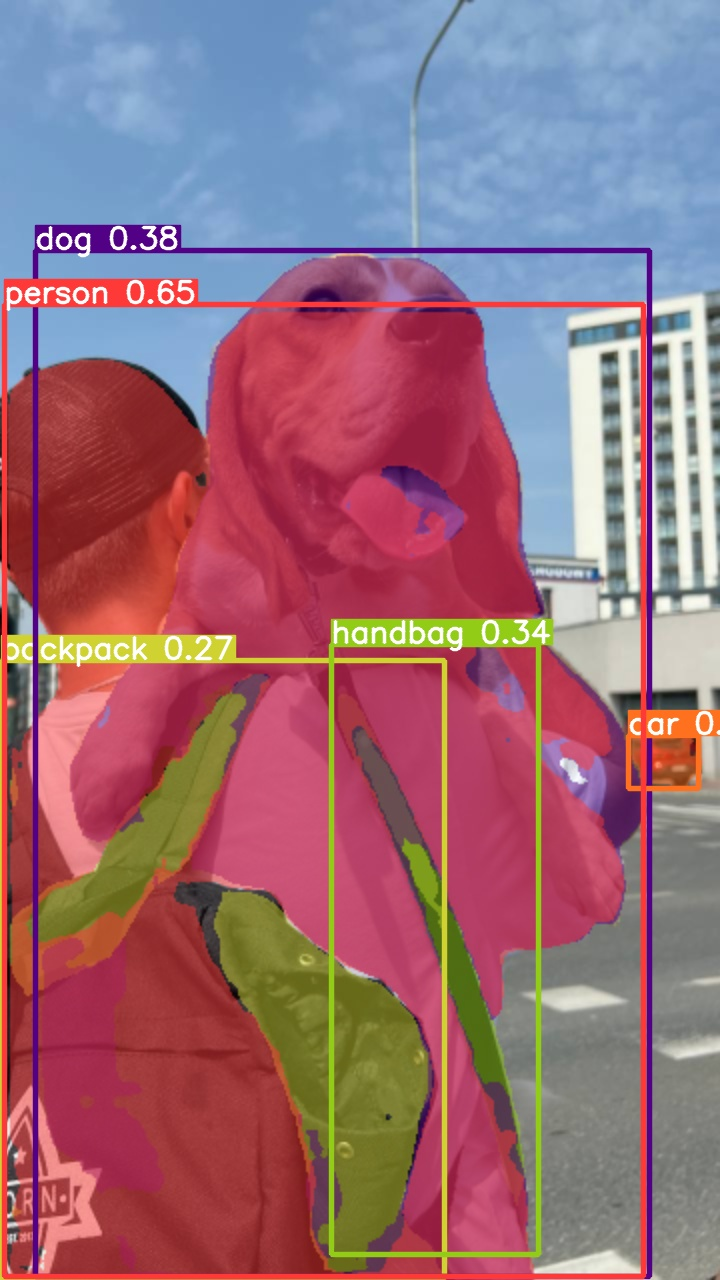

In [14]:
# Importa a fun√ß√£o 'Image' do m√≥dulo IPython.display para plotar a imagem.
from IPython.display import Image

# Plota a imagem com a segmenta√ß√£o das inst√¢ncias:
Image(filename='runs/segment/predict/dog.jpeg', height=600)

---

---

# T√≥pico IV: Exerc√≠cio Semantic Segmentation

- Observe os resultados do c√≥digo abaixo.

---

---

In [15]:
# Clonando o reposit√≥rio do GitHub
!git clone https://github.com/LukeTonin/simple-deep-learning

# Mudando para o diret√≥rio clonado
%cd simple-deep-learning

# Importando a fun√ß√£o create_semantic_segmentation_dataset do m√≥dulo mnist_extended
from simple_deep_learning.mnist_extended.semantic_segmentation import create_semantic_segmentation_dataset

# Importando a biblioteca numpy e definindo uma semente para gerar n√∫meros aleat√≥rios
import numpy as np
np.random.seed(1)

# Criando um conjunto de dados de segmenta√ß√£o sem√¢ntica (semantic segmentation dataset)
# com par√¢metros especificados, como o n√∫mero de amostras de treinamento e teste,
# o formato da imagem, o n√∫mero m√°ximo de d√≠gitos por imagem e o n√∫mero de classes.
train_x, train_y, test_x, test_y = create_semantic_segmentation_dataset(
    num_train_samples=1000,  # N√∫mero de amostras de treinamento
    num_test_samples=200,    # N√∫mero de amostras de teste
    image_shape=(60, 60),    # Formato da imagem (60x60 pixels)
    max_num_digits_per_image=4,  # N√∫mero m√°ximo de d√≠gitos por imagem
    num_classes=3  # N√∫mero de classes
)

Cloning into 'simple-deep-learning'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 55 (delta 24), reused 44 (delta 14), pack-reused 0
Receiving objects: 100% (55/55), 433.45 KiB | 10.57 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/simple-deep-learning/simple-deep-learning


(1000, 60, 60, 1) (1000, 60, 60, 3)


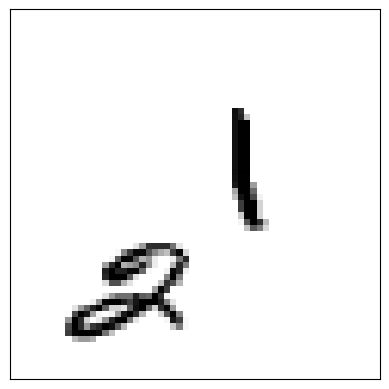

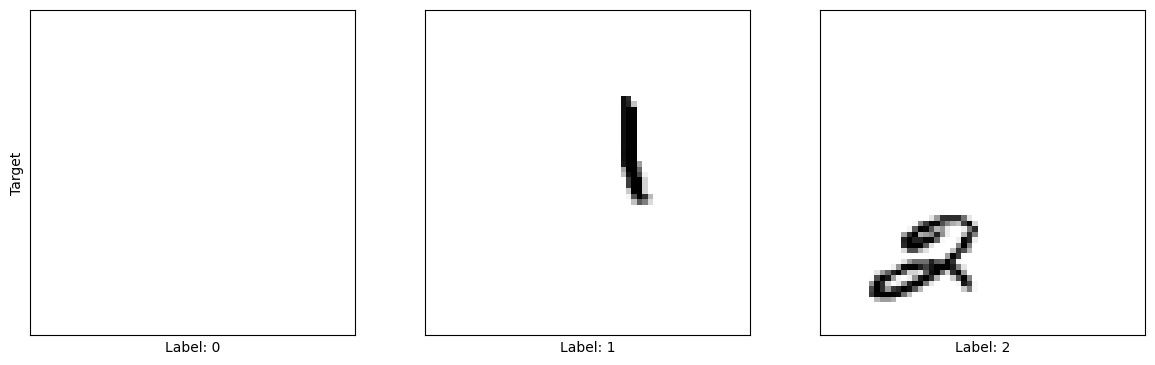

In [16]:
# Importando a biblioteca numpy como np
import numpy as np

# Importando as fun√ß√µes display_grayscale_array e plot_class_masks do m√≥dulo mnist_extended.semantic_segmentation
from simple_deep_learning.mnist_extended.semantic_segmentation import display_grayscale_array, plot_class_masks

# Exibindo as dimens√µes (formato) dos conjuntos de treinamento train_x e train_y
print(train_x.shape, train_y.shape)

# Gerando um √≠ndice de amostra aleat√≥rio entre 0 e o comprimento do conjunto de treinamento train_x
i = np.random.randint(len(train_x))

# Exibindo a imagem em tons de cinza correspondente √† amostra aleat√≥ria
display_grayscale_array(array=train_x[i])

# Exibindo os m√°scaras de classe correspondentes √† amostra aleat√≥ria
plot_class_masks(train_y[i])

#### Estrutura inicial da rede neural.

In [141]:
# Definindo a estrutura do modelo
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=train_x.shape[1:], padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=train_y.shape[-1], kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [142]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision()])

In [143]:
# Treinando o modelo
history = model.fit(train_x, train_y, epochs=20,
                    validation_data=(test_x, test_y))

Epoch 1/20
32/32 [==============================] - 5s 41ms/step - loss: 0.3057 - binary_accuracy: 0.9428 - recall: 0.0285 - precision: 0.0633 - val_loss: 0.0735 - val_binary_accuracy: 0.9601 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 1s 29ms/step - loss: 0.0665 - binary_accuracy: 0.9597 - recall: 7.1827e-04 - precision: 0.2248 - val_loss: 0.0600 - val_binary_accuracy: 0.9590 - val_recall: 0.0108 - val_precision: 0.2893
Epoch 3/20
32/32 [==============================] - 1s 30ms/step - loss: 0.0575 - binary_accuracy: 0.9580 - recall: 0.0514 - precision: 0.5202 - val_loss: 0.0567 - val_binary_accuracy: 0.9587 - val_recall: 0.0486 - val_precision: 0.5635
Epoch 4/20
32/32 [==============================] - 1s 29ms/step - loss: 0.0547 - binary_accuracy: 0.9560 - recall: 0.1418 - precision: 0.5774 - val_loss: 0.0540 - val_binary_accuracy: 0.9553 - val_recall: 0.1725 - val_precision: 0.5718
Epoch 5/20
32/32 [======================

In [144]:
# Realizando as predi√ß√µes
test_y_predicted = model.predict(test_x)

7/7 [==============================] - 0s 9ms/step


Exemplo 138


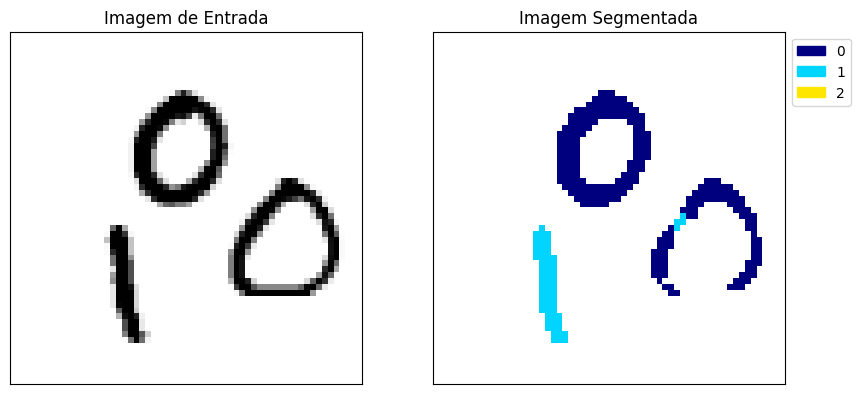

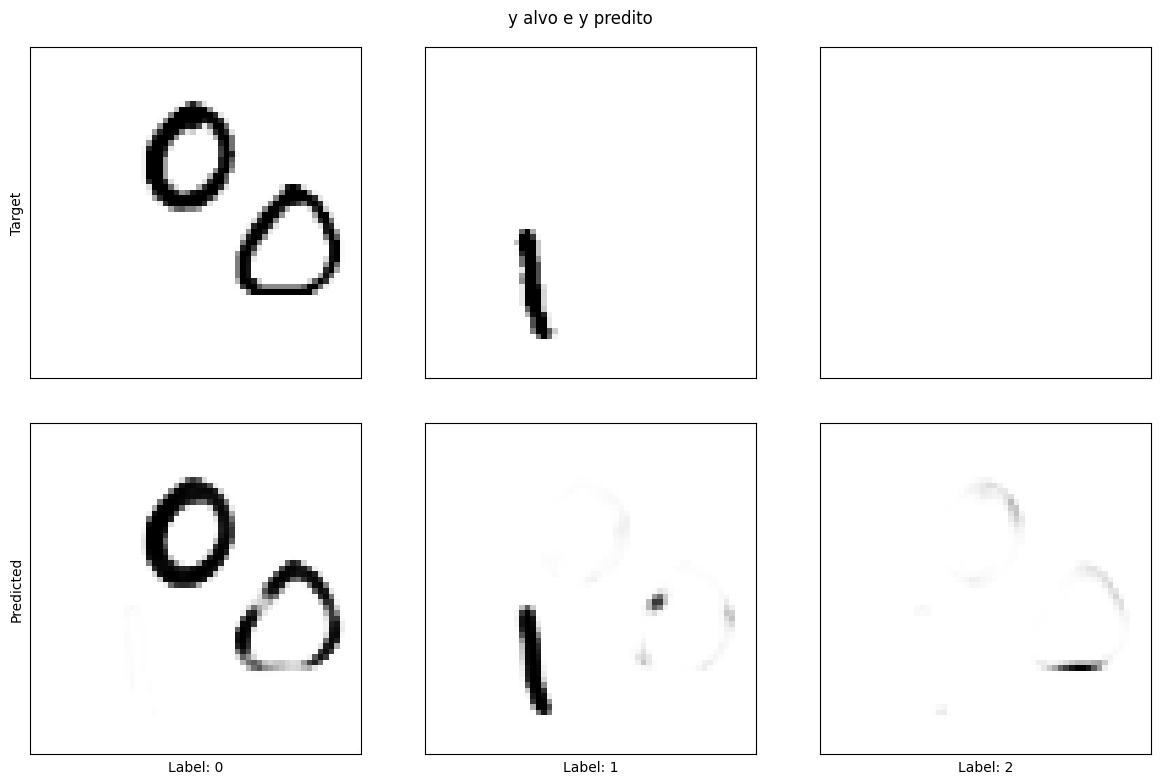

Exemplo 106


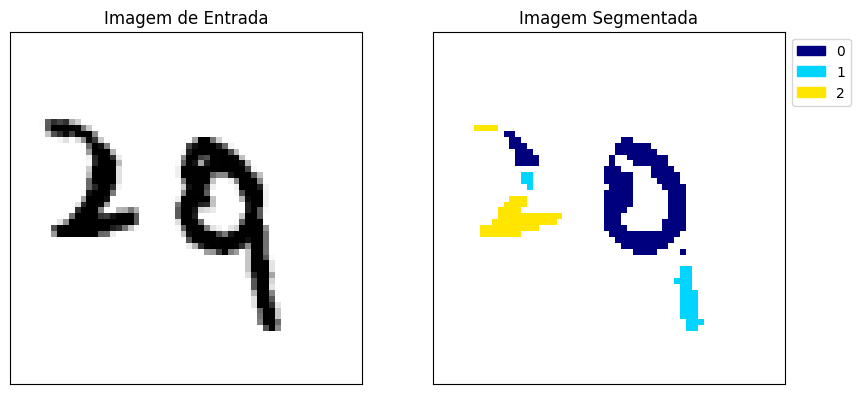

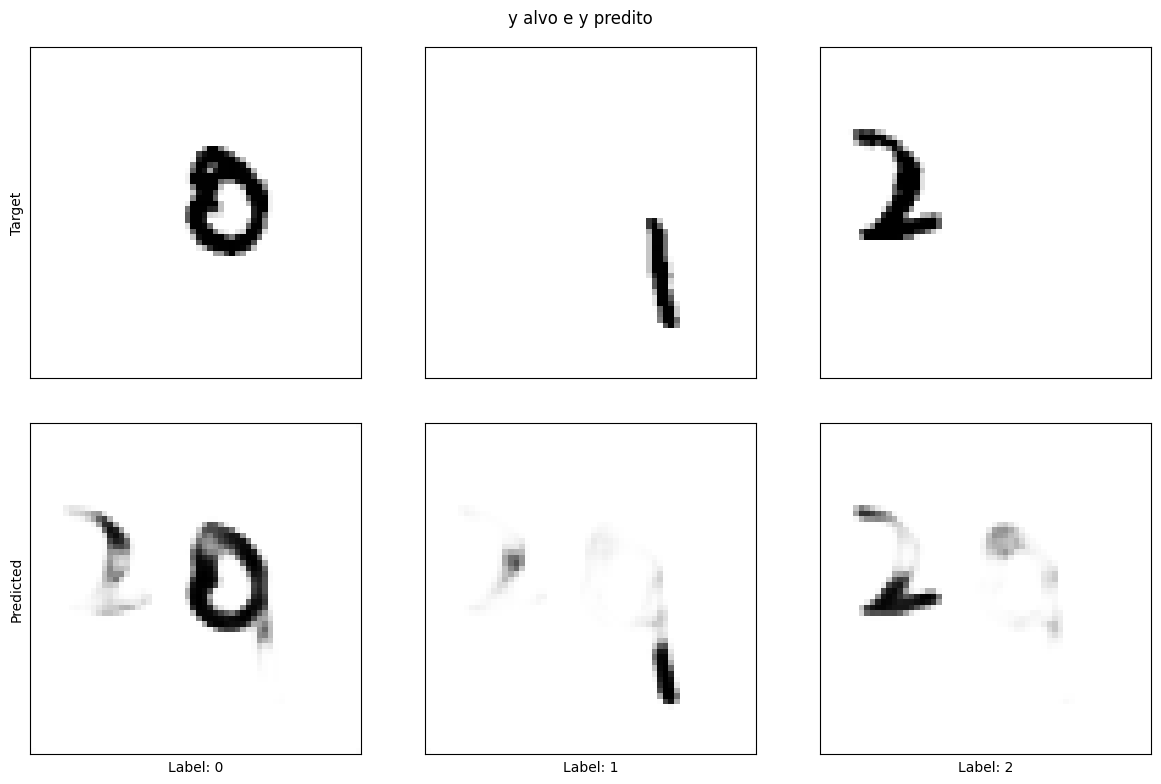

Exemplo 109


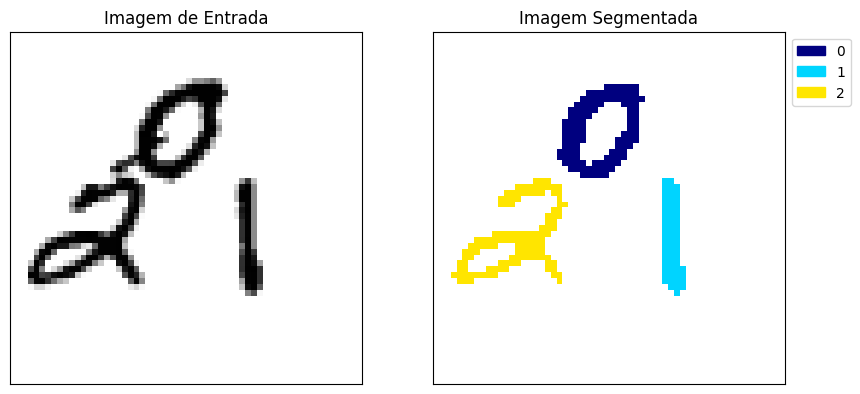

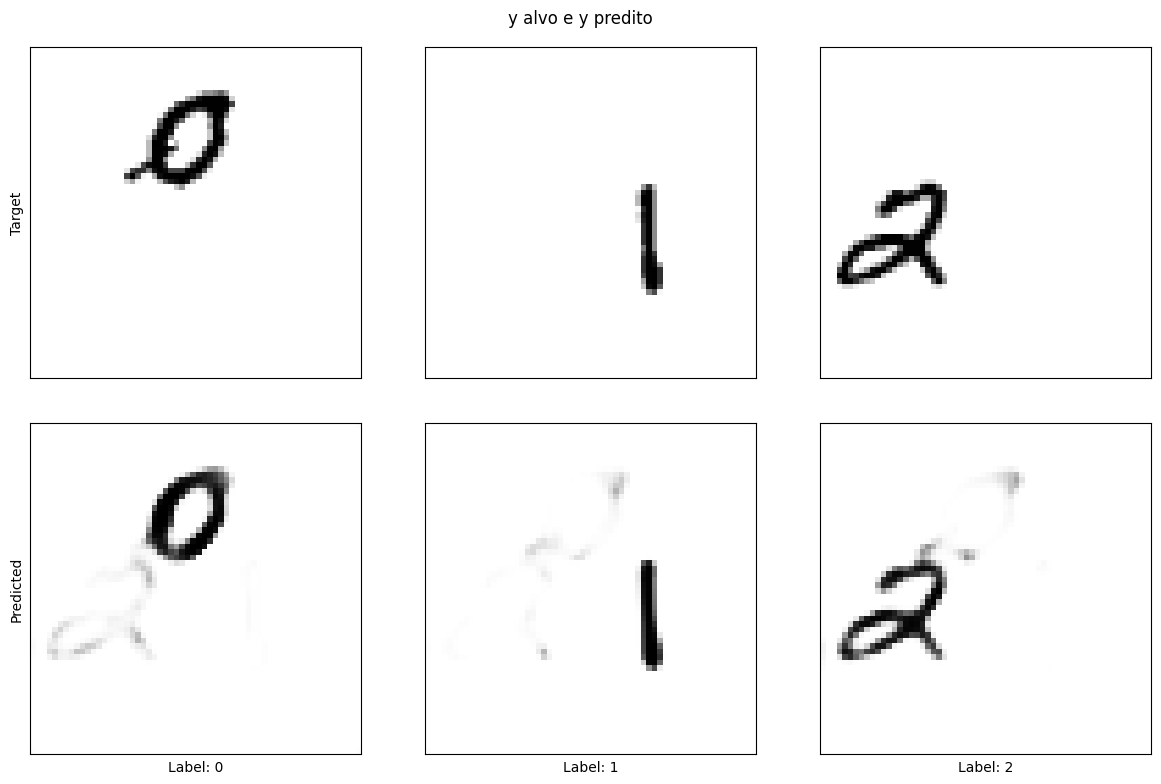

In [145]:
# Importando a biblioteca matplotlib e seu m√≥dulo pyplot como plt
import matplotlib
from matplotlib import pyplot as plt

# Importando a fun√ß√£o display_segmented_image do m√≥dulo mnist_extended.semantic_segmentation
from simple_deep_learning.mnist_extended.semantic_segmentation import display_segmented_image

# Definindo uma semente para gera√ß√£o de n√∫meros aleat√≥rios usando numpy
np.random.seed(6)

# Loop para criar tr√™s subplots (1 linha, 2 colunas) em cada itera√ß√£o
for _ in range(3):
    # Criando uma figura com dois subplots (ax1 e ax2) e definindo o tamanho da figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Gerando um √≠ndice de amostra aleat√≥rio entre 0 e o comprimento de test_y_predicted
    i = np.random.randint(len(test_y_predicted))

    # Exibindo o n√∫mero da amostra
    print(f'Exemplo {i}')

    # Exibindo a imagem em tons de cinza correspondente √† amostra aleat√≥ria no primeiro subplot
    display_grayscale_array(test_x[i], ax=ax1, title='Imagem de Entrada')

    # Exibindo a imagem segmentada correspondente √† amostra aleat√≥ria no segundo subplot
    display_segmented_image(test_y_predicted[i], ax=ax2, title='Imagem Segmentada', threshold=0.5)

    # Plotando as m√°scaras de classe correspondentes ao alvo (test_y) e ao previsto (test_y_predicted)
    plot_class_masks(test_y[i], test_y_predicted[i], title='y alvo e y predito')



---

---


#### Agora, altere a estrutura da rede neural (promova modifica√ß√µes) e exiba os seus resultados conforme o c√≥digo fornecido.


---

---

In [146]:
# Definindo a estrutura do modelo
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=train_x.shape[1:], padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(filters=train_y.shape[-1], kernel_size=(3, 3), activation='sigmoid', padding='same'))


# Compilando e treinando o modelo com a nova estrutura
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.Precision()])

history = model.fit(train_x, train_y, epochs=30,
                    validation_data=(test_x, test_y))

Epoch 1/30
32/32 [==============================] - 6s 45ms/step - loss: 0.3551 - binary_accuracy: 0.9404 - recall: 0.0269 - precision: 0.0528 - val_loss: 0.0753 - val_binary_accuracy: 0.9601 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 1s 33ms/step - loss: 0.0673 - binary_accuracy: 0.9595 - recall: 0.0092 - precision: 0.5571 - val_loss: 0.0589 - val_binary_accuracy: 0.9594 - val_recall: 0.0306 - val_precision: 0.6202
Epoch 3/30
32/32 [==============================] - 1s 33ms/step - loss: 0.0563 - binary_accuracy: 0.9576 - recall: 0.0842 - precision: 0.5841 - val_loss: 0.0544 - val_binary_accuracy: 0.9580 - val_recall: 0.0867 - val_precision: 0.6041
Epoch 4/30
32/32 [==============================] - 1s 33ms/step - loss: 0.0542 - binary_accuracy: 0.9561 - recall: 0.1504 - precision: 0.5921 - val_loss: 0.0528 - val_binary_accuracy: 0.9576 - val_recall: 0.1196 - val_precision: 0.6282
Epoch 5/30
32/32 [==========================

In [147]:
# Realizando as predi√ß√µes
test_y_predicted = model.predict(test_x)

7/7 [==============================] - 0s 10ms/step


Exemplo 138


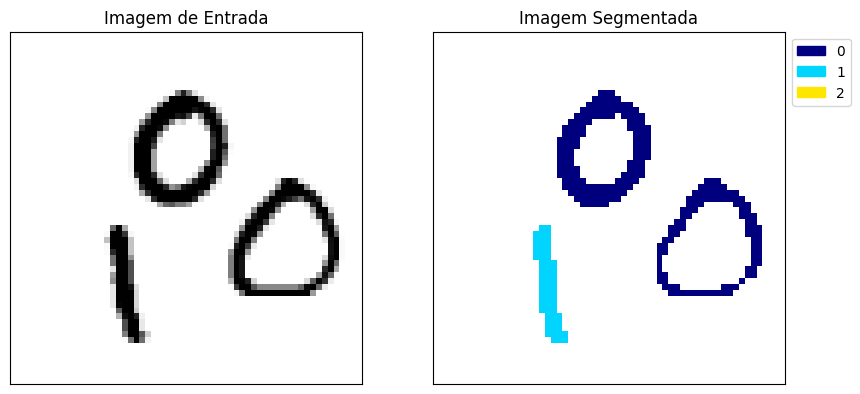

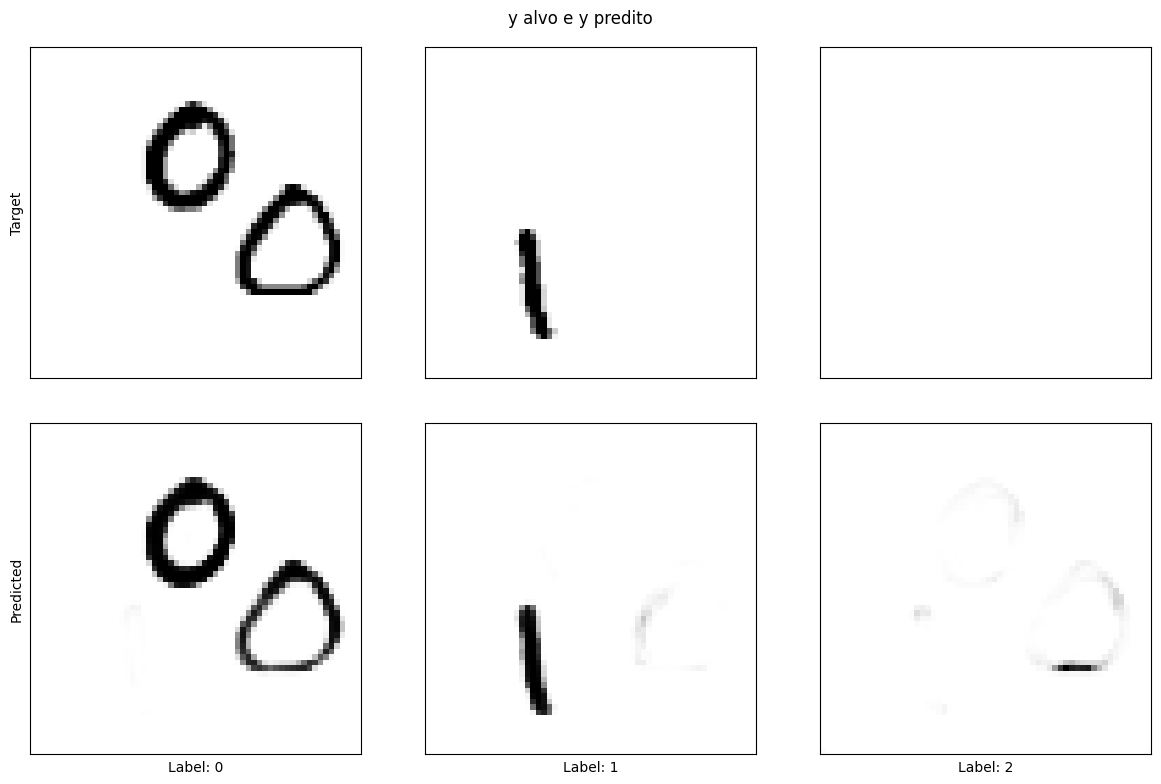

Exemplo 106


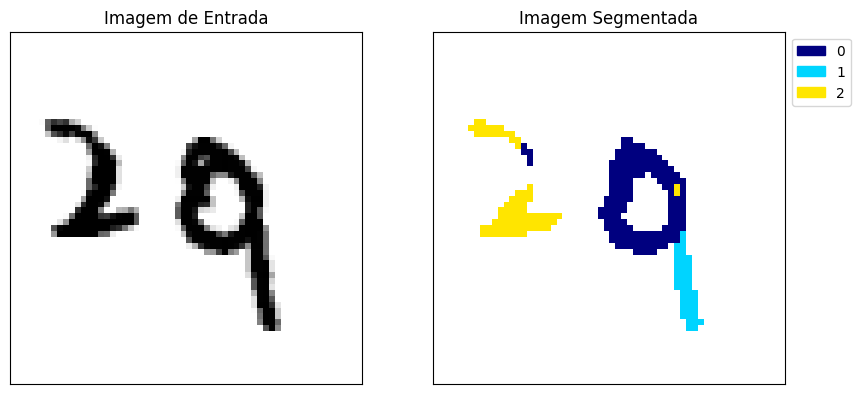

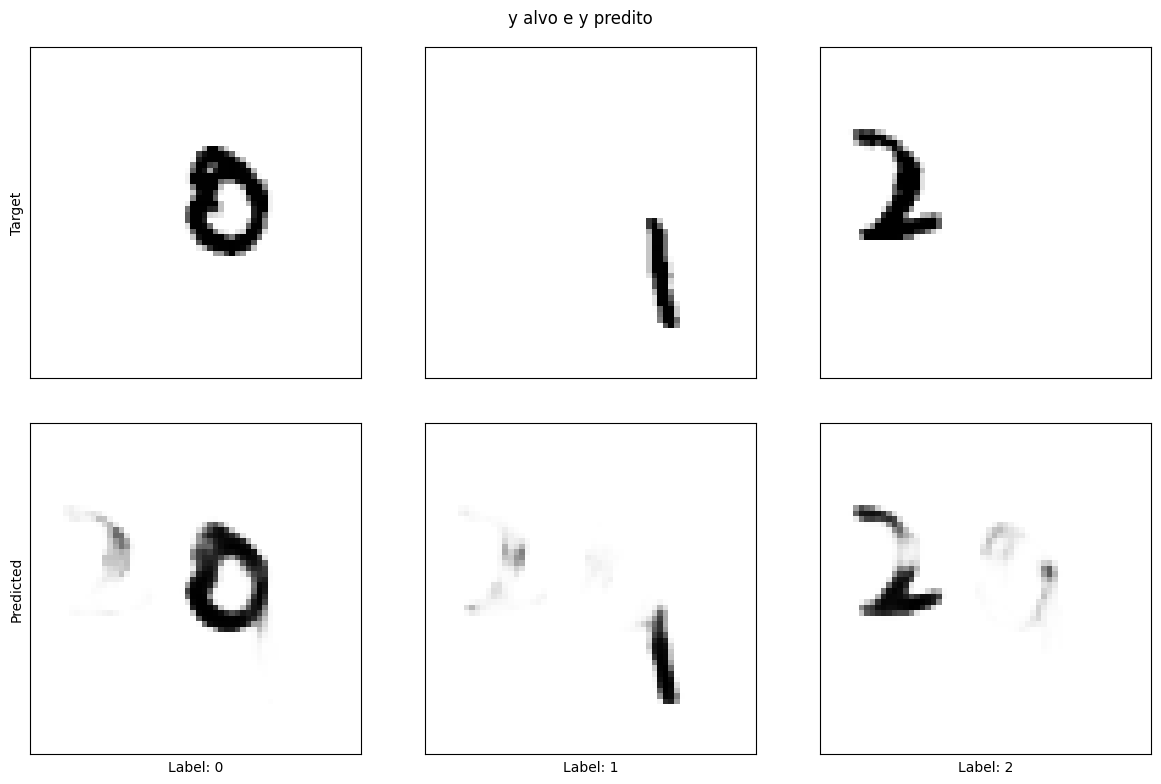

Exemplo 109


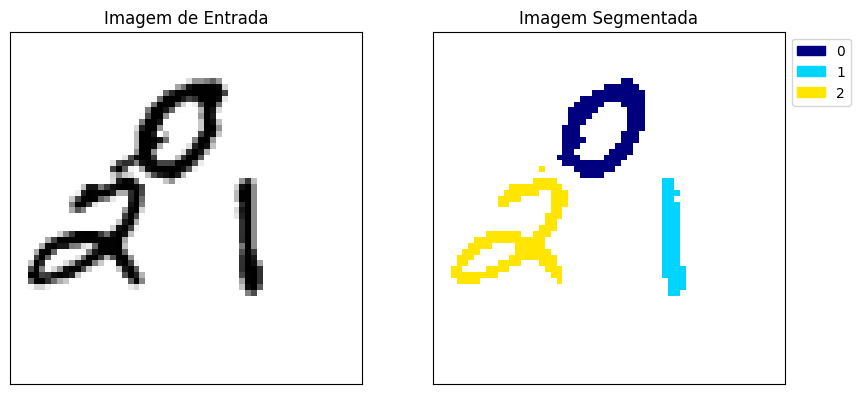

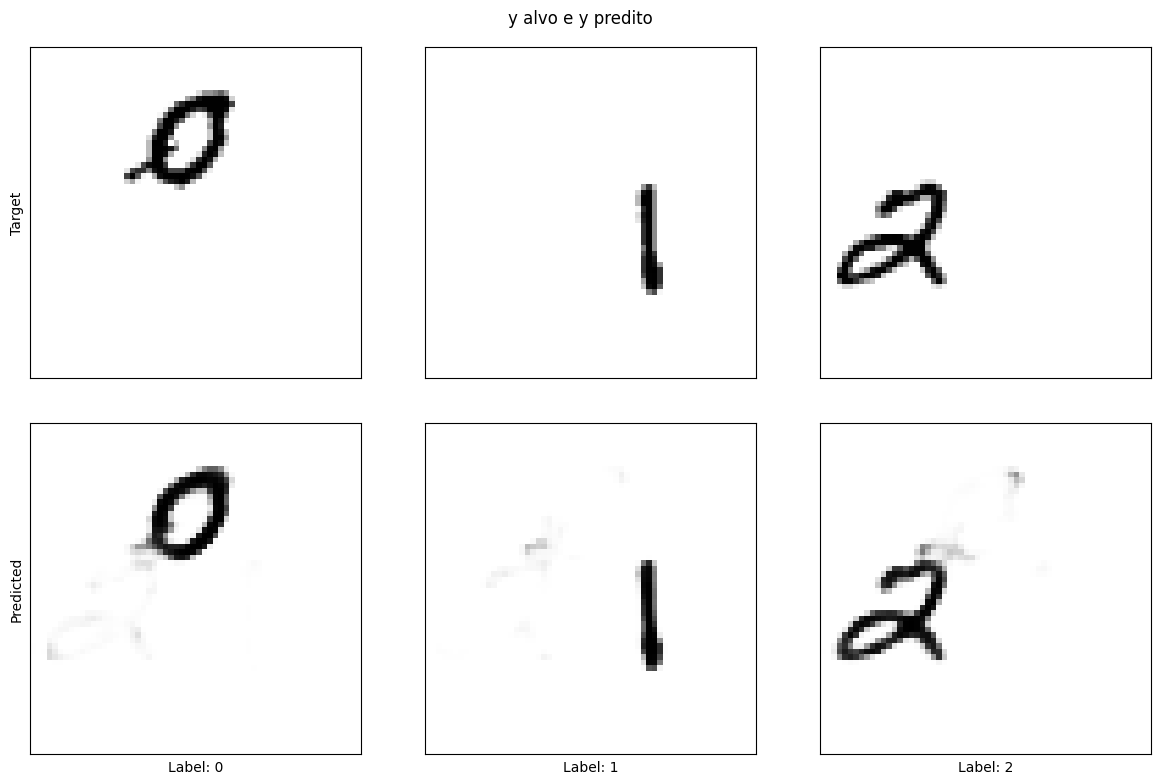

In [148]:
# Importando a biblioteca matplotlib e seu m√≥dulo pyplot como plt
import matplotlib
from matplotlib import pyplot as plt

# Importando a fun√ß√£o display_segmented_image do m√≥dulo mnist_extended.semantic_segmentation
from simple_deep_learning.mnist_extended.semantic_segmentation import display_segmented_image

# Definindo uma semente para gera√ß√£o de n√∫meros aleat√≥rios usando numpy
np.random.seed(6)

# Loop para criar tr√™s subplots (1 linha, 2 colunas) em cada itera√ß√£o
for _ in range(3):
    # Criando uma figura com dois subplots (ax1 e ax2) e definindo o tamanho da figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Gerando um √≠ndice de amostra aleat√≥rio entre 0 e o comprimento de test_y_predicted
    i = np.random.randint(len(test_y_predicted))

    # Exibindo o n√∫mero da amostra
    print(f'Exemplo {i}')

    # Exibindo a imagem em tons de cinza correspondente √† amostra aleat√≥ria no primeiro subplot
    display_grayscale_array(test_x[i], ax=ax1, title='Imagem de Entrada')

    # Exibindo a imagem segmentada correspondente √† amostra aleat√≥ria no segundo subplot
    display_segmented_image(test_y_predicted[i], ax=ax2, title='Imagem Segmentada', threshold=0.5)

    # Plotando as m√°scaras de classe correspondentes ao alvo (test_y) e ao previsto (test_y_predicted)
    plot_class_masks(test_y[i], test_y_predicted[i], title='y alvo e y predito')

---

---

# T√≥pico V-A: Autoencoder

<p style='text-align: justify;'>
Um autoencoder √© um tipo de modelo de aprendizado de m√°quina amplamente utilizado em tarefas de redu√ß√£o de dimensionalidade, compress√£o de dados e reconstru√ß√£o de informa√ß√µes. Ele faz parte da fam√≠lia de redes neurais artificiais e √© especialmente eficaz em representar dados de forma latente, o que pode ser √∫til em diversas aplica√ß√µes, como redu√ß√£o de ru√≠do em imagens, extra√ß√£o de caracter√≠sticas importantes e at√© mesmo na gera√ß√£o de dados semelhantes aos originais. </p>

<p style='text-align: justify;'>
A estrutura b√°sica de um autoencoder consiste em duas partes principais: o codificador (encoder) e o decodificador (decoder). </p>


- **Imagem Ilustrativa:** 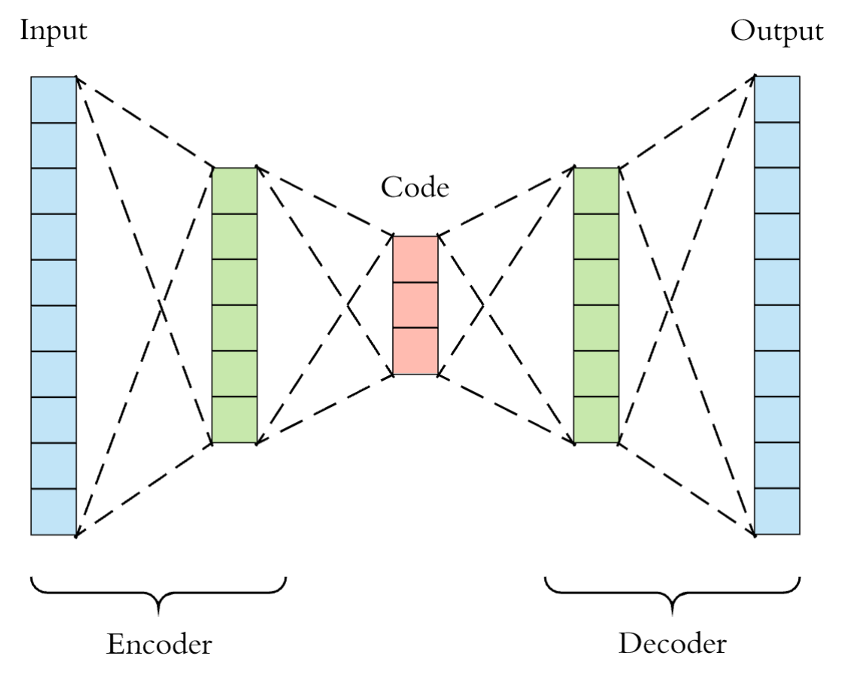








Aqui est√° uma descri√ß√£o mais detalhada de cada componente:

- **Encoder (Codificador):** O codificador √© a primeira metade do autoencoder e tem a responsabilidade de comprimir a entrada de alta dimens√£o em uma representa√ß√£o de baixa dimens√£o (tamb√©m chamada de espa√ßo latente). Isso √© feito por meio de camadas de redes neurais que gradualmente reduzem a dimensionalidade dos dados.
A sa√≠da do codificador √© uma representa√ß√£o latente, que cont√©m informa√ß√µes cruciais sobre os dados originais, mas em uma forma mais compacta.

- **Decoder (Decodificador):** O decodificador √© a segunda metade do autoencoder e realiza a tarefa inversa do codificador. Ele recebe a representa√ß√£o latente e tenta reconstruir os dados originais a partir dela. Para isso, o decodificador utiliza camadas de redes neurais que gradualmente aumentam a dimensionalidade da representa√ß√£o latente at√© que a sa√≠da se aproxime o m√°ximo poss√≠vel dos dados originais. A qualidade da reconstru√ß√£o √© uma m√©trica importante para avaliar o desempenho do autoencoder.

- Durante o treinamento de um autoencoder, a fun√ß√£o de perda √© usada para medir a diferen√ßa entre os dados de entrada e a sa√≠da reconstru√≠da. O objetivo √© minimizar essa perda, for√ßando o autoencoder a aprender representa√ß√µes latentes significativas que possam ser usadas para a reconstru√ß√£o precisa dos dados de entrada. Em outras palavras, o autoencoder tenta aprender uma representa√ß√£o compacta que capture as caracter√≠sticas essenciais dos dados.


- Os autoencoders s√£o amplamente aplicados em diversas √°reas, incluindo vis√£o computacional, processamento de linguagem natural, compress√£o de dados e detec√ß√£o de anomalias. Al√©m disso, variantes dos autoencoders, como os Variational Autoencoders (VAEs) e os Sparse Autoencoders, foram desenvolvidas para tarefas mais avan√ßadas, como gera√ß√£o de dados e aprendizado de distribui√ß√µes de probabilidade.

- Em resumo, os autoencoders s√£o ferramentas poderosas de aprendizado de m√°quina que t√™m a capacidade de aprender representa√ß√µes eficientes e compactas de dados, tornando-os valiosos em uma variedade de aplica√ß√µes de processamento de informa√ß√µes.



---

---



# T√≥pico V-B: Autoencoder

- Observe o c√≥digo abaixo e o seu resultado, sobretudo, o plot bidimensional.

- Utilize outra quantidade de √©pocas para o treinamento do autoencoder abaixo, rode o c√≥digo com o novo n√∫mero de √©pocas e observe o plot bidimensional do seu resultado.

- Observe as diferen√ßas entre o seu resultado e o resultado inicial.

---

---

In [149]:
# Suprime avisos para manter a sa√≠da mais limpa.
import warnings
warnings.filterwarnings('ignore')

# Importa as bibliotecas TensorFlow e Keras.
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten

# Carrega o conjunto de dados MNIST.
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensiona as imagens de treinamento para terem a forma original (28x28).
x_images = x_train.reshape(x_train.shape[0], 28, 28)

#### **Estrutura do autoencoder:**

In [150]:
# Define uma camada de entrada para a rede neural autoencoder com forma (28, 28, 1).
input_img = Input(shape=(28, 28, 1))

# Camadas de codifica√ß√£o (encoder):
# - A primeira camada densa com 512 unidades e ativa√ß√£o 'tanh'.
encoded = Dense(512, activation='tanh')(input_img)
# - A segunda camada densa com 128 unidades e ativa√ß√£o 'tanh'.
encoded = Dense(128, activation='tanh')(encoded)
# - A terceira camada densa com 32 unidades e ativa√ß√£o 'tanh'.
encoded = Dense(32, activation='tanh')(encoded)

# A camada Flatten 'aplanou' a sa√≠da do encoder para uma √∫nica dimens√£o.
encoded = Flatten()(encoded)

# Camadas de decodifica√ß√£o (decoder):
# - A primeira camada densa com 2 unidades (usado para redu√ß√£o de dimensionalidade).
encoded = Dense(2)(encoded)
# - A primeira camada densa com 32 unidades e ativa√ß√£o 'tanh'.
decoded = Dense(32, activation='tanh')(encoded)
# - A segunda camada densa com 128 unidades e ativa√ß√£o 'tanh'.
decoded = Dense(128, activation='tanh')(decoded)
# - A terceira camada densa com 512 unidades e ativa√ß√£o 'tanh'.
decoded = Dense(512, activation='tanh')(decoded)

# A camada de sa√≠da com 784 unidades e ativa√ß√£o 'sigmoid' para reconstruir a imagem.
decoded = Dense(784, activation='sigmoid')(decoded)

# Cria o modelo autoencoder que mapeia da entrada para a sa√≠da.
autoencoder = Model(inputs=input_img, outputs=decoded)

In [151]:
# Compila o modelo autoencoder com o otimizador 'adam' e a fun√ß√£o de perda 'mse' (Erro Quadr√°tico M√©dio).
autoencoder.compile(optimizer="adam", loss="mse")

# Redimensiona os dados de treinamento para as formas necess√°rias.
# - X_train_1 √© uma c√≥pia dos dados de treinamento com a forma (amostras, 28, 28, 1).
X_train_1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
# - X_train_2 √© uma c√≥pia dos dados de treinamento com a forma (amostras, 784).
X_train_2 = x_train.reshape(x_train.shape[0], 784)

# Treina o modelo autoencoder usando os dados de entrada X_train_1 e as metas X_train_2.
# - 'epochs' define o n√∫mero de √©pocas de treinamento.
# - 'verbose' controla a quantidade de informa√ß√µes exibidas durante o treinamento (1 para detalhes, 0 para silencioso).
history = autoencoder.fit(X_train_1, X_train_2, epochs=2, verbose=1)


Epoch 1/2
1875/1875 [==============================] - 22s 10ms/step - loss: 0.0561
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0502


In [152]:
# Cria um modelo separado para o encoder, usando a camada de entrada 'input_img' e a sa√≠da 'encoded'.
encoder = Model(inputs=input_img, outputs=encoded)

In [153]:
# Compila o modelo autoencoder com o otimizador 'adam' e a fun√ß√£o de perda 'mse' (Erro Quadr√°tico M√©dio).
autoencoder.compile(optimizer="adam", loss="mse")

# Redimensiona os dados de treinamento para as formas necess√°rias.
# - X_train_1 √© uma c√≥pia dos dados de treinamento com a forma (amostras, 28, 28, 1).
X_train_1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
# - X_train_2 √© uma c√≥pia dos dados de treinamento com a forma (amostras, 784).
X_train_2 = x_train.reshape(x_train.shape[0], 784)

# Treina o modelo autoencoder usando os dados de entrada X_train_1 e as metas X_train_2.
# - 'epochs' define o n√∫mero de √©pocas de treinamento.
# - 'verbose' controla a quantidade de informa√ß√µes exibidas durante o treinamento (1 para detalhes, 0 para silencioso).
history = autoencoder.fit(X_train_1, X_train_2, epochs=6, verbose=1)


Epoch 1/6
1875/1875 [==============================] - 21s 10ms/step - loss: 0.0492
Epoch 2/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0486
Epoch 3/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0482
Epoch 4/6
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0478
Epoch 5/6
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0475
Epoch 6/6
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0474


In [154]:
# Cria um modelo separado para o encoder, usando a camada de entrada 'input_img' e a sa√≠da 'encoded'.
encoder = Model(inputs=input_img, outputs=encoded)

#### **Plot bidimensional do resultado inicial:**

Perceba que exitem pontos coloridos onde cada cor representa um n√∫mero (0 at√© 9). Neste sentido, o d√≠gito 0 (em azul) representa a classe d√≠gito 0. Neste caso, o gr√°fico bidimensional apresenta a separabilidade entre as classes. Quanto mais potente/competente for seu autoencoder em separar as classes, mais separadas as classes de cada d√≠gito estar√£o no referido plot.

1875/1875 [==============================] - 7s 4ms/step


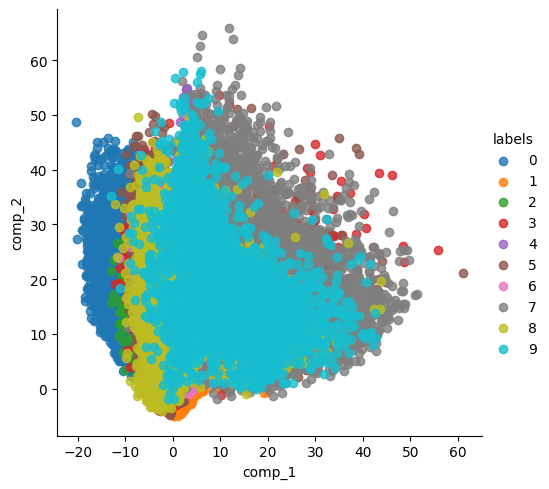

In [155]:
# Importa as bibliotecas seaborn (para visualiza√ß√£o estat√≠stica) e pandas (para manipula√ß√£o de dados).
import seaborn as sns
import pandas as pd

# Usa o encoder para projetar os dados de treinamento X_train_1 nos componentes latentes.
x_proj = encoder.predict(X_train_1[:60000])

# Exibe a forma do conjunto de dados projetado.
x_proj.shape

# Cria um DataFrame pandas chamado 'proj' para armazenar os componentes latentes.
proj = pd.DataFrame(x_proj)

# Nomeia as colunas do DataFrame como "comp_1" e "comp_2" para representar os componentes latentes.
proj.columns = ["comp_1", "comp_2"]

# Adiciona uma coluna chamada "labels" ao DataFrame para armazenar as etiquetas (r√≥tulos) dos dados.
proj["labels"] = y_train[:60000]

# Cria um gr√°fico de dispers√£o (scatter plot) usando seaborn para visualizar os componentes latentes.
sns.lmplot(x="comp_1", y="comp_2", hue="labels", data=proj, fit_reg=False)